# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install stumpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 5.1 MB/s eta 0:00:00


Импорт библиотек и модулей

In [4]:
import os
import sys

practice_dir_path = '/content/drive/MyDrive/Временные ряды/05 Snippets'
os.chdir(practice_dir_path)
sys.path.append(os.path.abspath("/content/drive/MyDrive/Временные ряды/05 Snippets/modules"))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

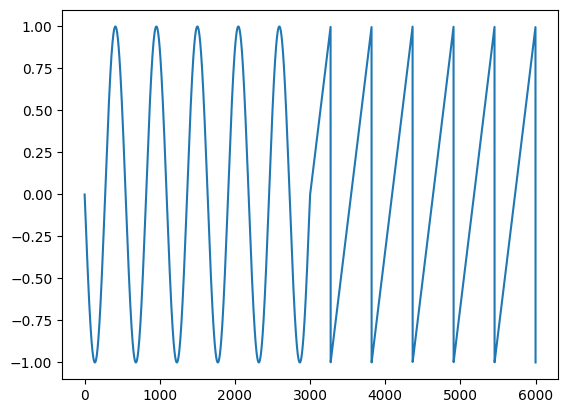

In [6]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [7]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)


600


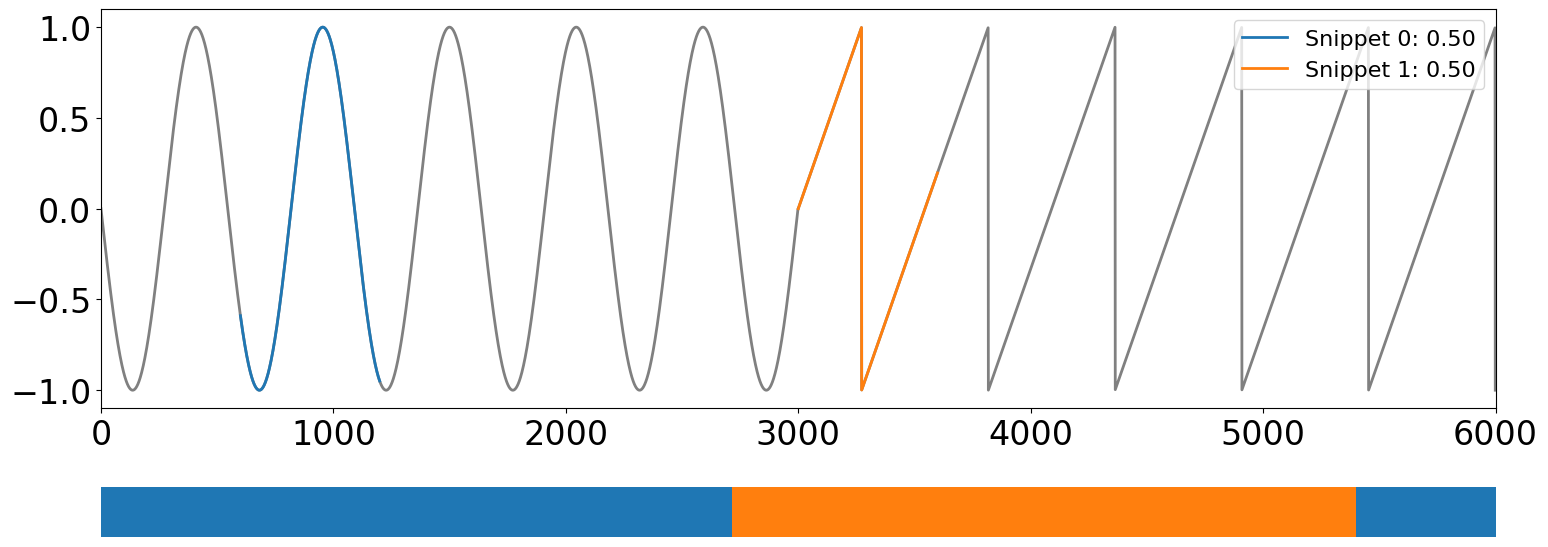

<Axes: >

In [8]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [9]:
# # INSERT YOUR CODE

# import pandas as pd

# # file_path = "/content/drive/MyDrive/Временные ряды/05 Snippets/datasets/PAMAP/PAMAP.txt"  # Замените на путь к вашему файлу
# def load_activity_map():
#     map = {}
#     map[0] = 'transient'
#     map[1] = 'lying'
#     map[2] = 'sitting'
#     map[3] = 'standing'
#     map[4] = 'walking'
#     map[5] = 'running'
#     map[6] = 'cycling'
#     map[7] = 'Nordic_walking'
#     map[9] = 'watching_TV'
#     map[10] = 'computer_work'
#     map[11] = 'car driving'
#     map[12] = 'ascending_stairs'
#     map[13] = 'descending_stairs'
#     map[16] = 'vacuum_cleaning'
#     map[17] = 'ironing'
#     map[18] = 'folding_laundry'
#     map[19] = 'house_cleaning'
#     map[20] = 'playing_soccer'
#     map[24] = 'rope_jumping'
#     return map

# def generate_three_IMU(name):
#     x = name +'_x'
#     y = name +'_y'
#     z = name +'_z'
#     return [x,y,z]

# def generate_four_IMU(name):
#     x = name +'_x'
#     y = name +'_y'
#     z = name +'_z'
#     w = name +'_w'
#     return [x,y,z,w]

# def generate_cols_IMU(name):
#     # temp
#     temp = name+'_temperature'
#     output = [temp]
#     # acceleration 16
#     acceleration16 = name+'_3D_acceleration_16'
#     acceleration16 = generate_three_IMU(acceleration16)
#     output.extend(acceleration16)
#     # acceleration 6
#     acceleration6 = name+'_3D_acceleration_6'
#     acceleration6 = generate_three_IMU(acceleration6)
#     output.extend(acceleration6)
#     # gyroscope
#     gyroscope = name+'_3D_gyroscope'
#     gyroscope = generate_three_IMU(gyroscope)
#     output.extend(gyroscope)
#     # magnometer
#     magnometer = name+'_3D_magnetometer'
#     magnometer = generate_three_IMU(magnometer)
#     output.extend(magnometer)
#     # oreintation
#     oreintation = name+'_4D_orientation'
#     oreintation = generate_four_IMU(oreintation)
#     output.extend(oreintation)
#     return output

# def load_IMU():
#     output = ['time_stamp','activity_id', 'heart_rate']
#     hand = 'hand'
#     hand = generate_cols_IMU(hand)
#     output.extend(hand)
#     chest = 'chest'
#     chest = generate_cols_IMU(chest)
#     output.extend(chest)
#     ankle = 'ankle'
#     ankle = generate_cols_IMU(ankle)
#     output.extend(ankle)
#     return output

# def load_subjects(root='/content/drive/MyDrive/Временные ряды/05 Snippets/datasets/PAMAP/subject'):
#     output = pd.DataFrame()
#     print( dir(output))
#     cols = load_IMU()

#     #for i in range(101,110):
#     path = root + str(109) +'.dat'
#     subject = pd.read_table(path, header=None, sep='\s+')
#     subject.columns = cols
#     subject['id'] = 109
#     #output = output.append(subject, ignore_index=True)
#     output = pd.concat([output, subject], ignore_index=True)
#     output.reset_index(drop=True, inplace=True)
#     return output

# data = load_subjects()

# # df = pd.read_csv(file_path, sep=r'\s+', header=None)
# # print(df)
# print(data['time_stamp'])
# gyro_y = data[(data['time_stamp'] >= 17.90) & (data['time_stamp'] <= 60.30)]['hand_3D_gyroscope_y']
# #gyro_y = data['hand_3D_gyroscope_y']


# # 4. Применение stumpy.snippets для поиска топ-k сниппетов
# m = 100  # Длина подпоследовательности (измените при необходимости)
# k = 5   # Количество типичных подпоследовательностей

# snippet_result = snippets(gyro_y.values, m=m, k=k, percentage=0.5)

In [10]:
# import stumpy
# import matplotlib.pyplot as plt
# import pandas as pd

# # Загрузка данных из сгенерированного файла PAMAP.txt
# columns = [
#     "timestamp",
#     "activityID",
#     "heart_rate",
#     "temperature",
#     "acc_x1",
#     "acc_y1",
#     "acc_z1",
#     "acc_x2",
#     "acc_y2",
#     "acc_z2",
#     "gyro_x",
#     "gyro_y",
#     "gyro_z",
#     "mag_x",
#     "mag_y",
#     "mag_z",
#     "orientation_x",
#     "orientation_y",
#     "orientation_z",
#     "orientation_w",
# ]

# # Чтение данных
# file_path = '/content/drive/MyDrive/Временные ряды/05 Snippets/datasets/PAMAP/PAMAP.txt'
# pamap_data = pd.read_csv(file_path, sep=" ", header=None, names=columns)

# # Фильтрация временного интервала от 1790 сек. до 1930 сек.
# filtered_data = pamap_data[(pamap_data["timestamp"] >= 0.01790) & (pamap_data["timestamp"] <= 0.01930)]
# #print(pamap_data["timestamp"])
# # Извлечение временного ряда "gyro_y" (угол тангажа)
# time_series = filtered_data["gyro_y"].values

# # Применение функции snippets для поиска типичных подпоследовательностей
# snippets = stumpy.snippets(time_series, k=5, m = 100)  # Ищем 5 типичных сниппета

import pandas as pd

ts_url = './datasets/PAMAP/PAMAP.txt'
ts = np.loadtxt(ts_url)
df = pd.DataFrame(ts.T, columns=['timestamp','activity ID', 'heart rate', 'temp', 'acc16X', 'acc16Y', 'acc16Z', 'acc6X', 'acc6Y', 'acc6Z', 'gyrX', 'gyrY', 'gyrZ', 'magX', 'magY', 'magZ', 'or1', 'or2', 'or3', 'pr4'])

df.head()

,timestamp,activity ID,heart rate,temp,acc16X,acc16Y,acc16Z,acc6X,acc6Y,acc6Z,gyrX,gyrY,gyrZ,magX,magY,magZ,or1,or2,or3,pr4
0,505.71,2.0,NaN,35.0625,0.497271,9.08249,-1.87554,0.319610,9.10631,-1.64252,-0.064955,0.033557,0.051343,2.52139,-23.9094,3.66977,0.636708,-0.766698,0.073248,0.037565
1,505.72,2.0,NaN,35.0625,0.693164,8.93258,-1.67790,0.379878,8.90965,-1.41677,0.063998,0.052043,0.078401,2.12795,-23.8953,4.08997,0.636387,-0.766974,0.073379,0.037113
2,505.73,2.0,79.0,35.0625,0.929013,9.04638,-1.44167,0.606483,8.89380,-1.23683,0.192540,0.034474,0.070010,1.87388,-24.2730,4.23135,0.635648,-0.767586,0.073587,0.036706
3,505.74,2.0,NaN,35.0625,1.039680,9.38386,-1.59565,0.772609,8.99907,-1.23753,0.282665,0.053817,0.057465,1.73597,-23.3649,3.94322,0.635121,-0.768060,0.073553,0.035983
4,505.75,2.0,NaN,35.0625,1.070930,9.38219,-1.82740,0.938327,9.21025,-1.41926,0.335187,0.016476,0.011713,2.25530,-24.4165,4.65783,0.633378,-0.769606,0.072906,0.034988


In [11]:
ts = df[ (df['timestamp'] >= 1790) & (df['timestamp'] <= 1930)]
ts = ts[['gyrY']]

In [12]:
snippet_result = snippets(ts.to_numpy().T[0], 600, 2, percentage=0.5)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

600


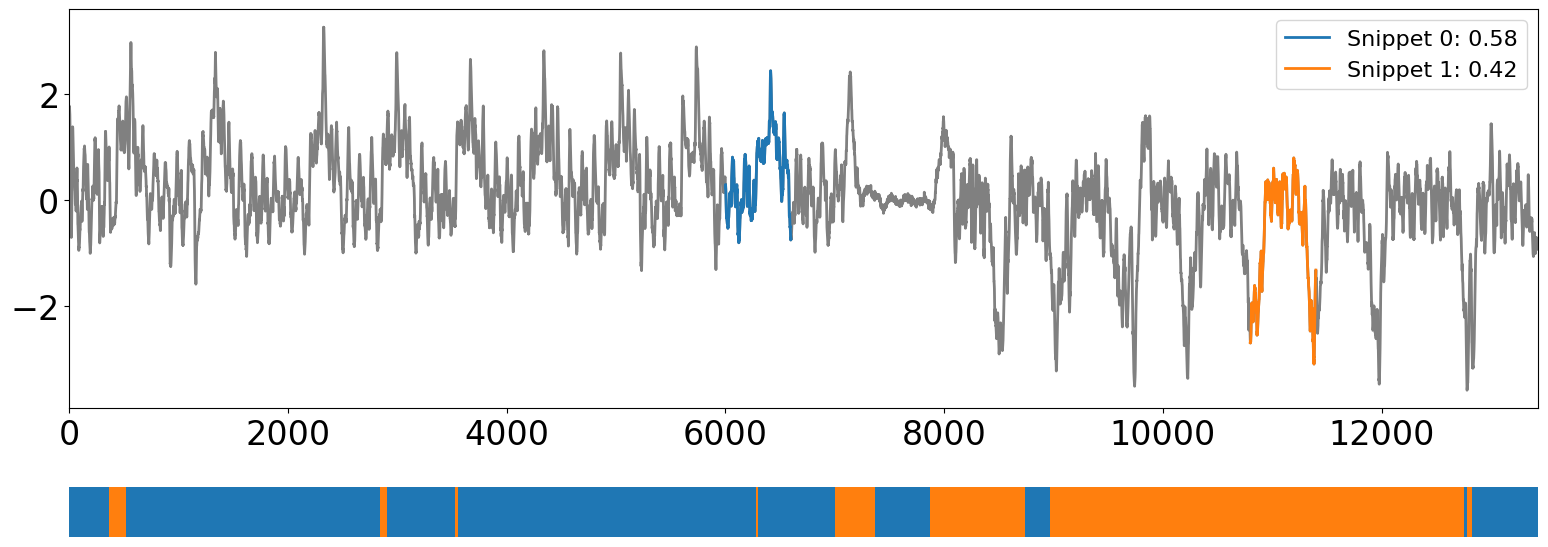

<Axes: >

In [13]:
# INSERT YOUR CODE
plot_snippets(ts.to_numpy().T[0], snippet_result)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [14]:
# # INSERT YOUR CODE

# from sklearn.metrics import classification_report, accuracy_score
# true_labels = data['activity_id'].values  # Истинные метки активностей (activityID)

# # Пример сниппетов
# # snippets_indices: массив индексов начала сниппетов
# # snippets: массив данных сниппетов
# # Здесь y_pred - это предсказанные метки на основе сниппетов
# y_pred = np.zeros_like(true_labels)  # Инициализируем пустые предсказания

# # Предположим, что каждому сниппету соответствует метка, полученная как мода в этом интервале
# from scipy.stats import mode
# print(snippet_result[1])
# for start_idx in snippet_result[1]:
#     end_idx = start_idx + m
#     snippet_labels = true_labels[start_idx:end_idx]  # Истинные метки в этом сниппете
#     most_common_label = mode(snippet_labels, nan_policy='omit').mode[0]  # Метка-сниппета
#     y_pred[start_idx:end_idx] = most_common_label  # Присваиваем эту метку всему сниппету

# # Оценка точности разметки
# print("Accuracy:", accuracy_score(true_labels, y_pred))
# print("Classification Report:")
# print(classification_report(true_labels, y_pred))

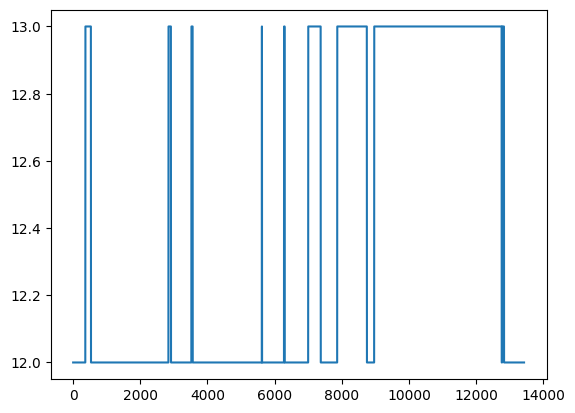

In [15]:
from sklearn.metrics import accuracy_score

snippets_regimes = snippet_result[5]
predicted_labels2 = np.zeros_like(ts.to_numpy().T[0])
for regime in snippets_regimes:
    predicted_labels2[regime[1] : regime[2]] = regime[0]
predicted_labels2[predicted_labels2 == 0] = 12
predicted_labels2[predicted_labels2 == 1] = 13
plt.plot(predicted_labels2)

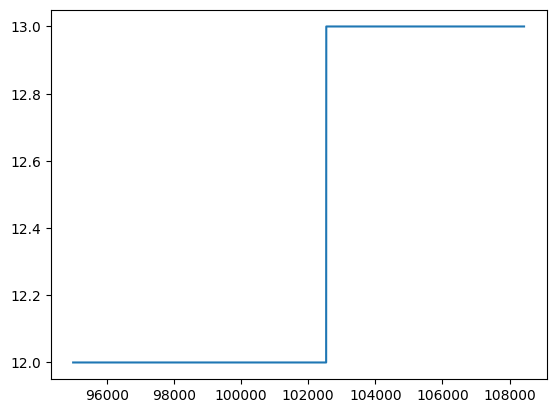

In [16]:
selection_labels = df[ (df['timestamp'] >= 1790) & (df['timestamp'] <= 1930)]
selection_labels = selection_labels[['activity ID']]

plt.plot(selection_labels)

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [17]:
# INSERT YOUR CODE
selection2 = df[ (df['timestamp'] >= 1790) & (df['timestamp'] <= 1930)]
selection2 = selection2[['gyrX','gyrY','gyrZ']]
selection2.head()

predicted_labels3 = []
for i in range(3):
    sel3 = selection2.to_numpy()[:,i]
    snp3 = snippets(sel3, 600, 2, percentage=0.5)

    snippets_regimes3 = snp3[5]
    predicted_labels3.append(np.zeros_like(sel3))
    for regime in snippets_regimes3:
        predicted_labels3[i][regime[1] : regime[2]] = regime[0]
    predicted_labels3[i][predicted_labels3[i] == 0] = 12
    predicted_labels3[i][predicted_labels3[i] == 1] = 13

Visualizing snippets for gyrX


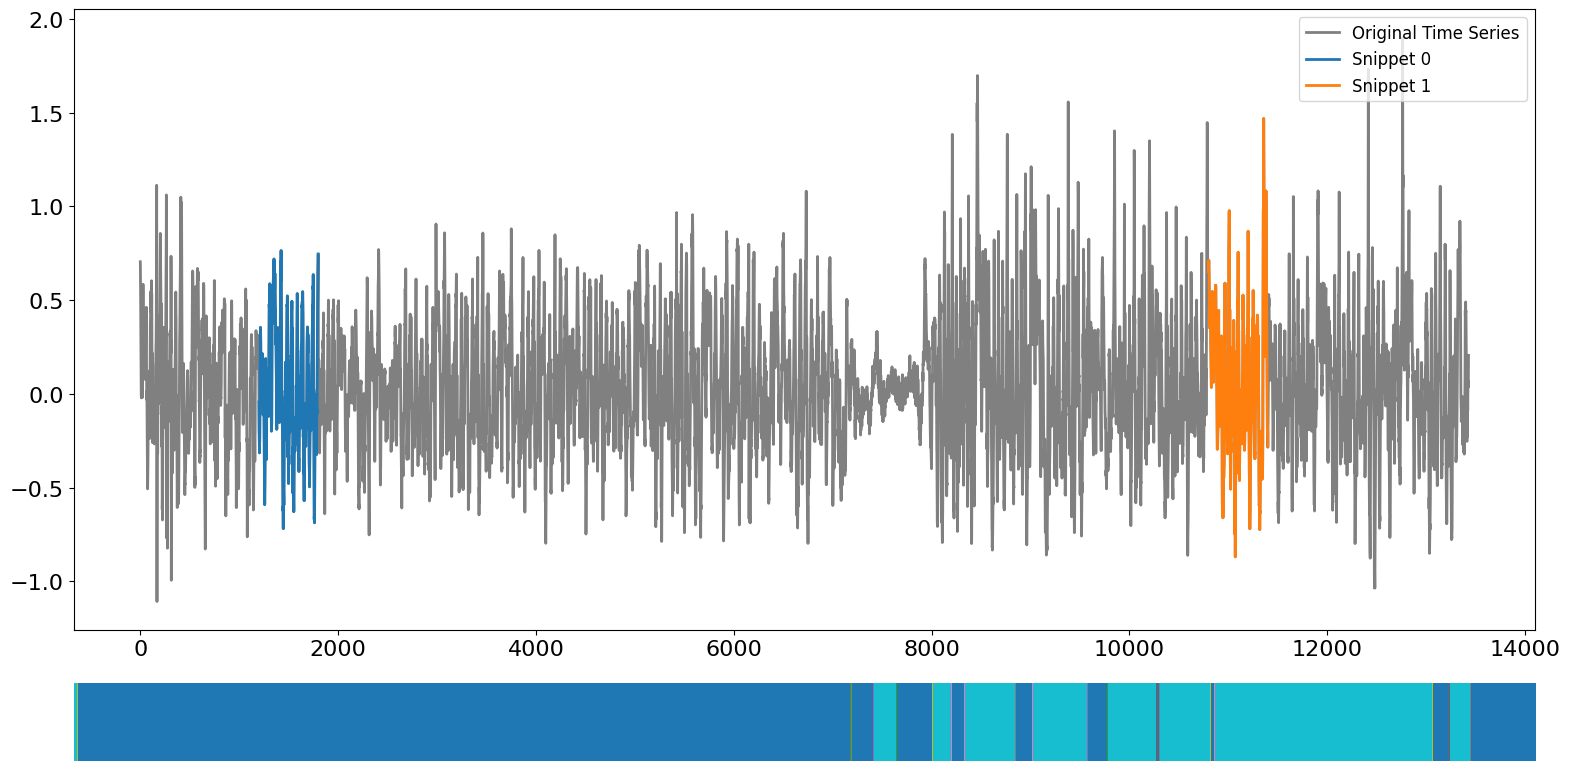

Visualizing snippets for gyrY


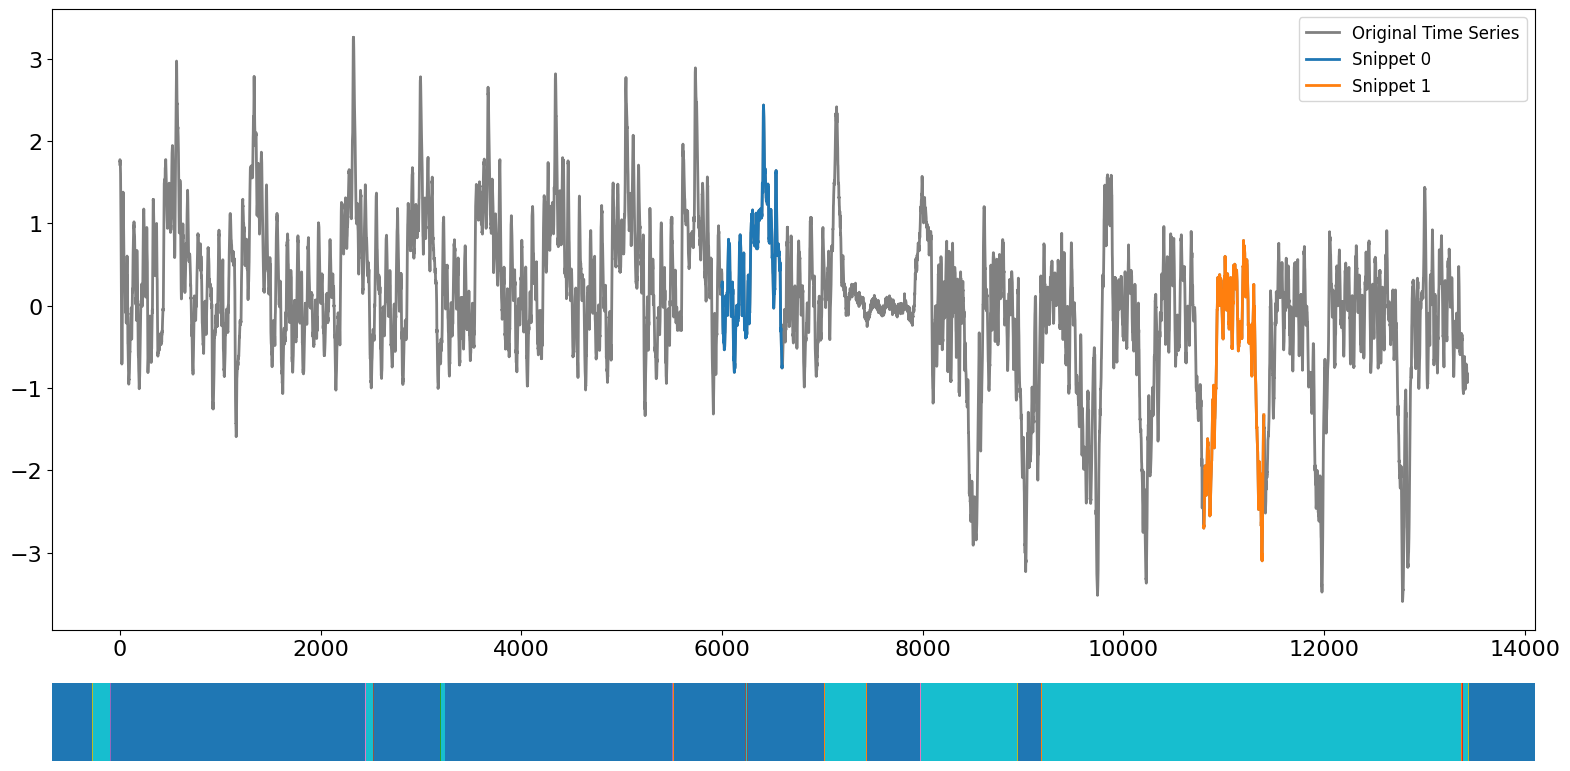

Visualizing snippets for gyrZ


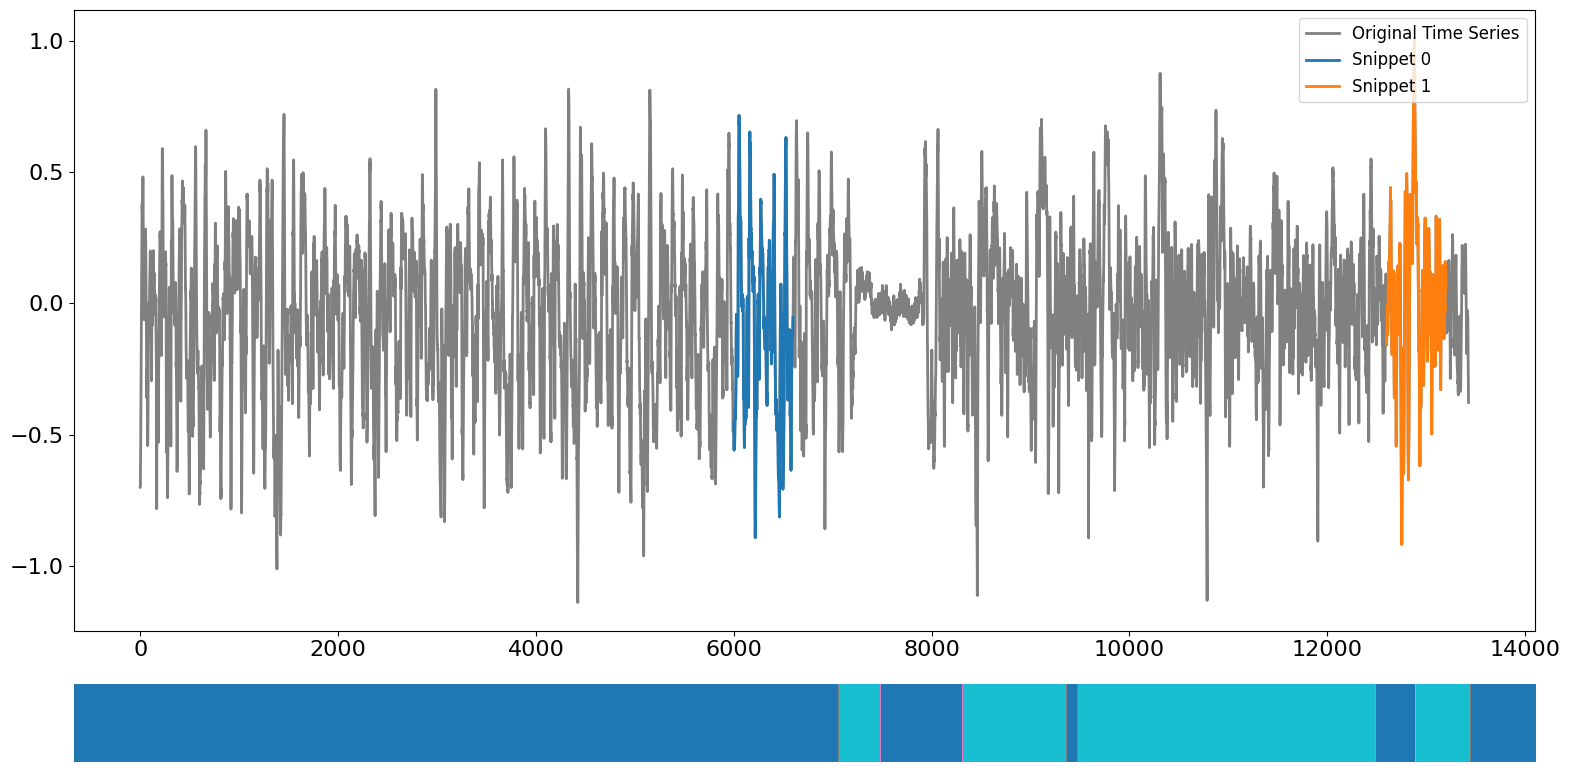

In [18]:
# Визуализация сниппетов
def plot_snippets(ts, snippets):
    with plt.rc_context(
        {
            "lines.linewidth": 2,
            "font.size": 16,
        }
    ):
        fig, (ax_main, ax_labels) = plt.subplots(
            2, figsize=(16, 8), gridspec_kw={"height_ratios": [16, 2]}
        )
        color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

        # График временного ряда
        ax_main.plot(ts, color="gray", label="Original Time Series")

        # Визуализация сниппетов
        m = len(snippets[0][0])  # Длина одного сниппета
        snippet_indices = snippets[1]
        for i, snippet_start in enumerate(snippet_indices):
            snippet_end = snippet_start + m
            ax_main.plot(
                np.arange(snippet_start, snippet_end),
                ts[snippet_start:snippet_end],
                c=color_cycle[i % len(color_cycle)],
                label=f"Snippet {i}",
            )

        # Метки режимов
        labels = np.zeros_like(ts)
        snippets_regimes = snippets[5]
        for regime in snippets_regimes:
            labels[regime[1]:regime[2]] = regime[0]

        img = ax_labels.imshow([labels], cmap="tab10", aspect="auto")
        ax_labels.axis("off")
        ax_main.legend(prop={"size": 12}, loc="upper right")
        plt.tight_layout()
        plt.show()

# Вызов функции для визуализации
for i, sel in enumerate(["gyrX", "gyrY", "gyrZ"]):
    print(f"Visualizing snippets for {sel}")
    ts_data = selection2[sel].to_numpy()
    snp = snippets(ts_data, 600, 2, percentage=0.5)  # Сниппеты для текущего ряда
    plot_snippets(ts_data, snp)

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [ ]:
# INSERT YOUR CODE
from scipy import stats as st

predictions3 = st.mode(predicted_labels3).mode
accuracy_score(predictions3, selection_labels)

0.8891288160833953

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [ ]:
# INSERT YOUR CODE
def compute_area_changes(areas):
    if len(areas) < 2:
        return 0
    return [(areas[i-1] / areas[i]) - 1 for i in range(1,len(areas))]

k = 9
snp4 = snippets(selection2.to_numpy().T[0], 600, k, percentage=0.5) #10
areas = snp4[4]
changes = compute_area_changes(areas)
print(f'{areas=}')
print(f'{changes=}')

areas=array([182886.57667175, 162953.44351988, 147930.64515618, 138008.02569615,
       128619.69857616, 120014.95242013, 111597.81003988, 103952.11615998,
        96514.48361779])
changes=[0.1223240989653791, 0.10155298347977637, 0.0718988581278397, 0.0729929180670843, 0.07169728423433352, 0.07542390282787648, 0.07355015138056165, 0.0770623461204083]


Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

<BarContainer object of 8 artists>

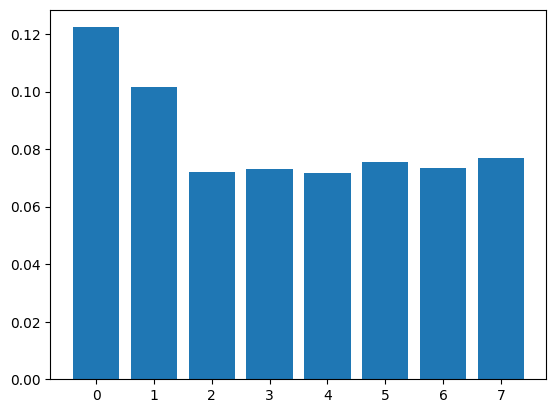

In [ ]:
# INSERT YOUR CODE
plt.bar(range(len(changes)),changes)

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?